Series([], dtype: int64)
DATA NOW IS:

Age                               float64
Gender                             object
Height                            float64
Weight                            float64
CALC                               object
FAVC                               object
FCVC                              float64
NCP                               float64
SCC                                object
SMOKE                              object
CH2O                              float64
family_history_with_overweight     object
FAF                               float64
TUE                               float64
CAEC                               object
MTRANS                             object
NObeyesdad                         object
NObeyesdad_encoded                  int64
dtype: object


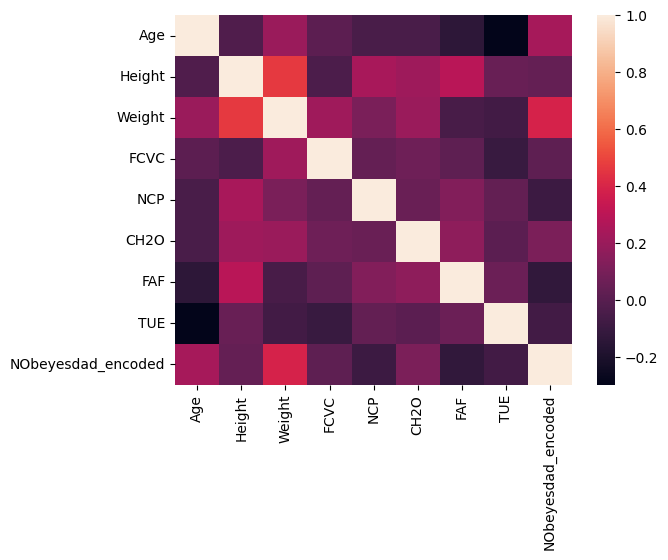

{'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Obesity_Type_I': 2, 'Obesity_Type_II': 3, 'Obesity_Type_III': 4, 'Overweight_Level_I': 5, 'Overweight_Level_II': 6}             NObeyesdad  NObeyesdad_encoded
0        Normal_Weight                   1
1        Normal_Weight                   1
2        Normal_Weight                   1
3   Overweight_Level_I                   5
4  Overweight_Level_II                   6


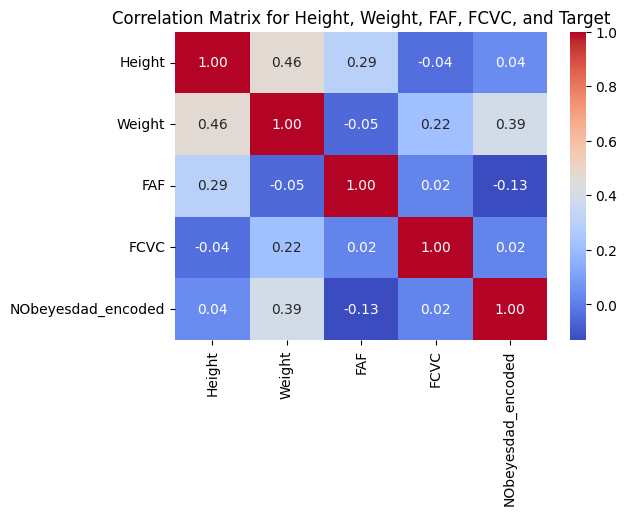

0.8888888888888888 0.8870801360232052 0.950354609929078 0.9498852931224187 0.8605200945626478 0.8604846633515785 0.9456264775413712 0.9453535508621397


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydot
from IPython.display import Image
from six import StringIO

# Suppress warnings
warnings.filterwarnings('ignore')

# Load data
url = 'https://drive.google.com/file/d/1s8oo6AjB8T9u3lMvrNtdWjo9EP8MTPw8/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

# Display data and check types
col_names = data.columns
col_names
#print(data.dtypes)


# Check for missing values in the dataset
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])

# Encode the target variable
encoder = LabelEncoder()
data['NObeyesdad_encoded'] = encoder.fit_transform(data['NObeyesdad'])

print("DATA NOW IS:\n")
print(data.dtypes)

#Let us generate a heatmap between all the NUMERIC features of the dataset:
num_df = data.select_dtypes(include=['float64' , 'int64'])
corr = num_df.corr()
sns.heatmap(corr)
plt.show()

# Display the mapping from original class to encoded label
target_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(target_mapping, data[['NObeyesdad', 'NObeyesdad_encoded']].head())

# Select specific features and the target variable for correlation analysis
selected_features_with_target = data[['Height', 'Weight', 'FAF', 'FCVC', 'NObeyesdad_encoded']]

# Compute and plot the correlation matrix
selected_features_correlation_matrix = selected_features_with_target.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(selected_features_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix for Height, Weight, FAF, FCVC, and Target')
plt.show()

# Define the target variable
y = data['NObeyesdad_encoded']

# Update the feature set
X = data[['FAF', 'FCVC', 'Height', 'Weight']]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred, average='weighted')

# SVM
svm = SVC(random_state=42, kernel='linear',C=1.0)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)
dt_pred = decision_tree.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred, average='weighted')

# Output the new performance metrics
print(log_reg_accuracy, log_reg_f1, svm_accuracy, svm_f1, knn_accuracy, knn_f1, dt_accuracy, dt_f1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


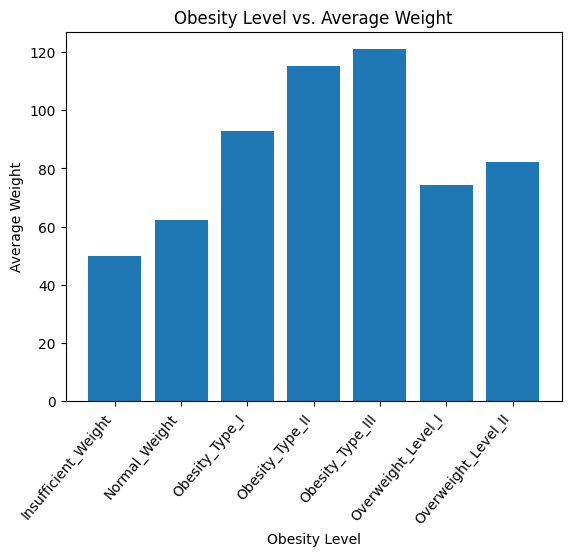

In [ ]:
# Create a Figure and Axes object
fig, ax = plt.subplots()
obesity_level=data.groupby('NObeyesdad')['Weight'].mean()
categories=obesity_level.index
values=obesity_level.values

ax.bar(categories, values)
ax.set_xlabel("Obesity Level")
ax.set_ylabel("Average Weight")
ax.set_title("Obesity Level vs. Average Weight")
plt.xticks(rotation=50, ha='right')
# Show the plot
plt.show()

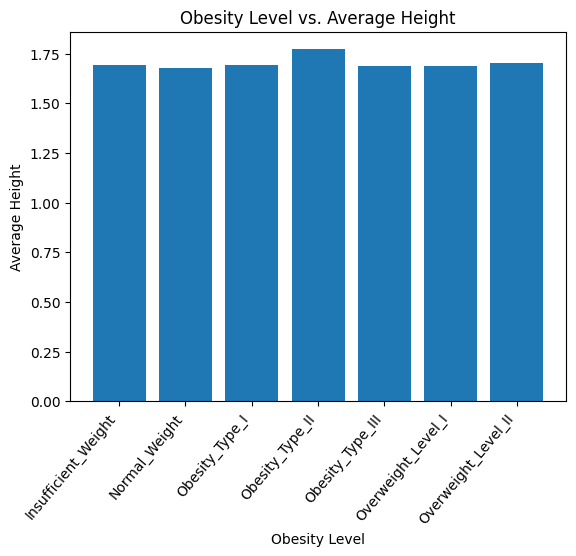

In [ ]:
# Create a Figure and Axes object
fig, ax = plt.subplots()
obesity_level=data.groupby('NObeyesdad')['Height'].mean()
categories=obesity_level.index
values=obesity_level.values

ax.bar(categories, values)
ax.set_xlabel("Obesity Level")
ax.set_ylabel("Average Height")
ax.set_title("Obesity Level vs. Average Height")
plt.xticks(rotation=50, ha='right')
# Show the plot
plt.show()

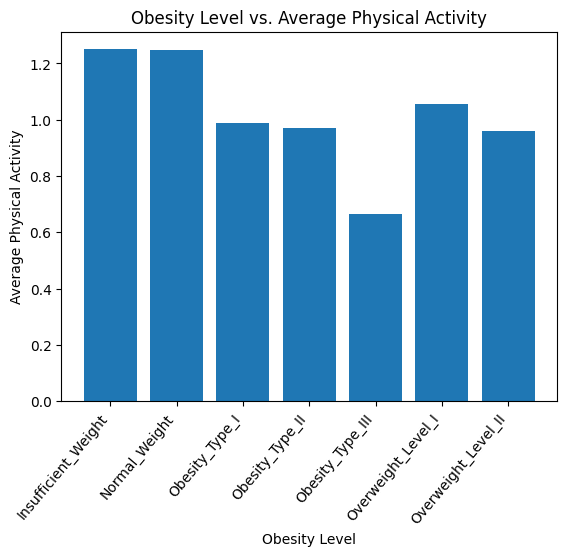

In [ ]:
# Create a Figure and Axes object
fig, ax = plt.subplots()
obesity_level=data.groupby('NObeyesdad')['FAF'].mean()
categories=obesity_level.index
values=obesity_level.values

ax.bar(categories, values)
ax.set_xlabel("Obesity Level")
ax.set_ylabel("Average Physical Activity")
ax.set_title("Obesity Level vs. Average Physical Activity")
plt.xticks(rotation=50, ha='right')
# Show the plot
plt.show()

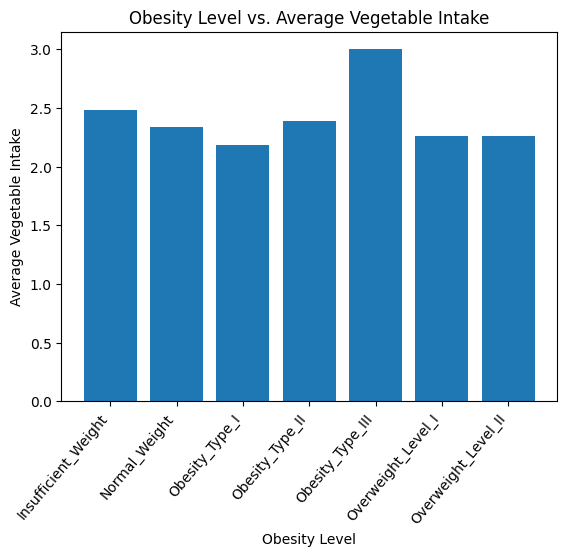

In [ ]:
# Create a Figure and Axes object
fig, ax = plt.subplots()
obesity_level=data.groupby('NObeyesdad')['FCVC'].mean()
categories=obesity_level.index
values=obesity_level.values

ax.bar(categories, values)
ax.set_xlabel("Obesity Level")
ax.set_ylabel("Average Vegetable Intake")
ax.set_title("Obesity Level vs. Average Vegetable Intake")
plt.xticks(rotation=50, ha='right')
# Show the plot
plt.show()

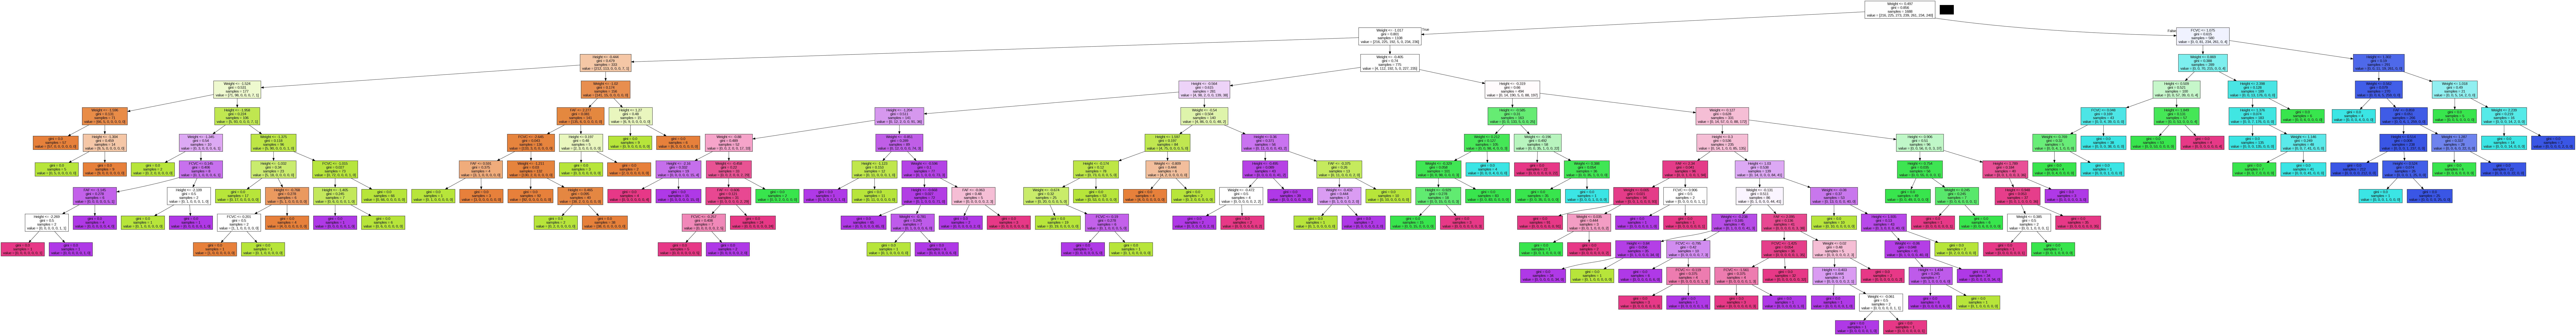

In [ ]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names

    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

graph, = print_tree(decision_tree, features=X.columns)
Image(graph.create_png())

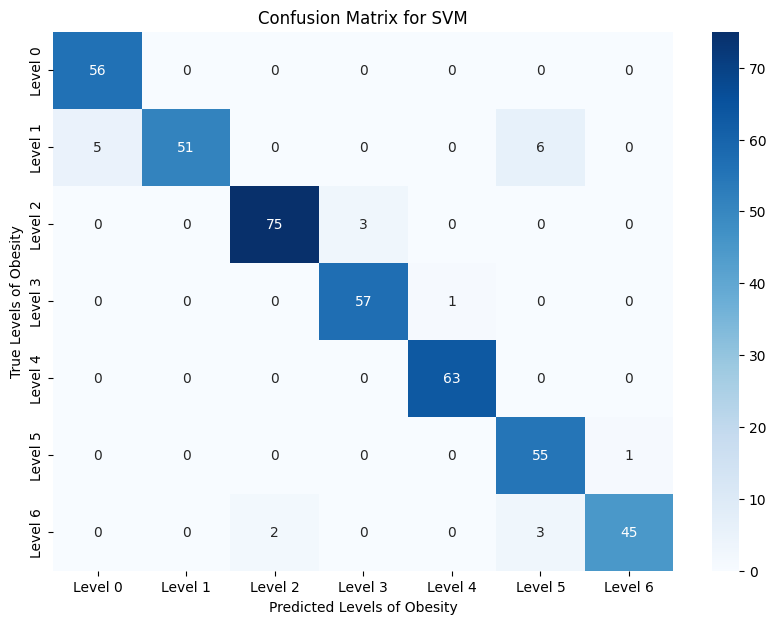

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'svm_pred' are the predictions from your SVM model and 'y_test' are the true labels
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)

# Display the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(svm_confusion_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'Level 6'],
            yticklabels=['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'Level 6'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Levels of Obesity')
plt.ylabel('True Levels of Obesity')
plt.show()


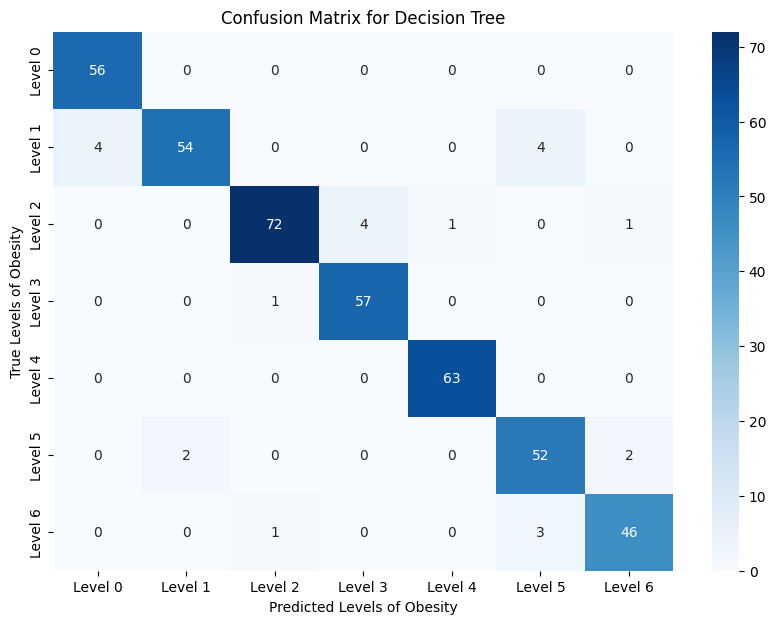

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'dt_pred' are the predictions from your Decision Tree model and 'y_test' are the true labels
dt_confusion_matrix = confusion_matrix(y_test, dt_pred)

# Display the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(dt_confusion_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'Level 6'],
            yticklabels=['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'Level 6'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Levels of Obesity')
plt.ylabel('True Levels of Obesity')
plt.show()


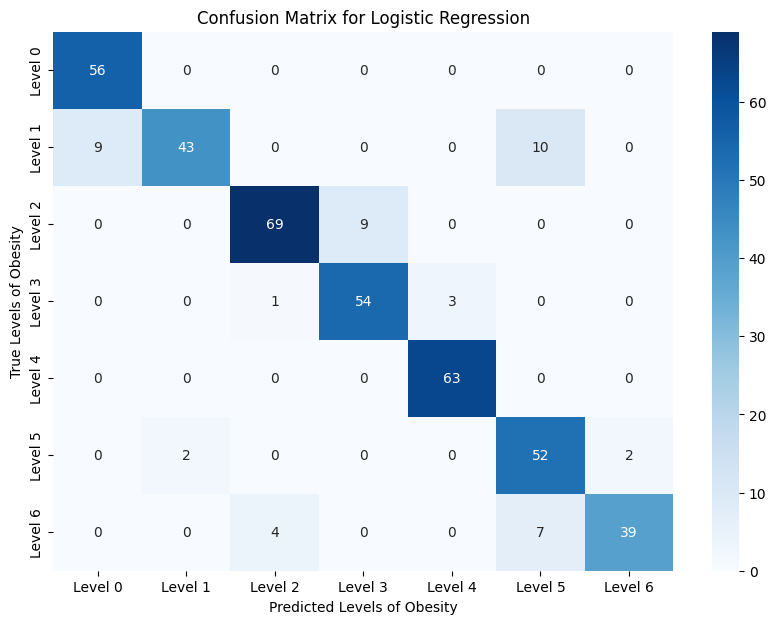

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'log_reg_pred' are the predictions from your Logistic Regression model and 'y_test' are the true labels
log_reg_confusion_matrix = confusion_matrix(y_test, log_reg_pred)

# Display the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(log_reg_confusion_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'Level 6'],
            yticklabels=['Level 0', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'Level 6'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Levels of Obesity')
plt.ylabel('True Levels of Obesity')
plt.show()
